<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/CWRU_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hashaninimeshika","key":"95beb196deca7c93b02c84e31a9057d8"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600  ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d brjapon/cwru-bearing-datasets

 82% 33.0M/40.4M [00:00<00:00, 53.3MB/s]
100% 40.4M/40.4M [00:00<00:00, 63.6MB/s]


In [6]:
from zipfile import ZipFile
file_name = "/content/cwru-bearing-datasets.zip"

with ZipFile(file_name, 'r') as zip1:
  zip1.extractall()
  print('Done')

Done


In [7]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os


In [8]:
import matplotlib.pyplot as plt


In [37]:
df = pd.read_csv('/content/feature_time_48k_2048_load_1.csv')

In [10]:
df

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,Ball_007_1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,Ball_007_1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,Ball_007_1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,Ball_007_1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,Ball_007_1
...,...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174,Normal_1
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958,Normal_1
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299,Normal_1
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672,Normal_1


# **Pure Data**

In [38]:
df = df.drop('fault', axis=1)


In [13]:
df

,max,min,mean,sd,rms,skewness,kurtosis,crest,form
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085
...,...,...,...,...,...,...,...,...,...
2295,0.21425,-0.19839,0.010769,0.064100,0.064983,-0.212497,-0.119312,3.297037,6.034174
2296,0.21967,-0.20882,0.013136,0.068654,0.069883,-0.061308,-0.295122,3.143410,5.319958
2297,0.20799,-0.21613,0.012571,0.067128,0.068279,-0.154754,-0.071405,3.046161,5.431299
2298,0.21425,-0.22405,0.012608,0.066813,0.067977,-0.326966,0.023662,3.151821,5.391672


In [39]:
# x is my training data
# mu is the mean
# std is the standard deviation
mu=0.0
std = 0.1
def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy 

## **Noisy Data**

In [40]:
noisy_df = gaussian_noise(df, mu,std)

In [41]:
noisy_df

,max,min,mean,sd,rms,skewness,kurtosis,crest,form
0,0.300689,-0.319052,0.016228,0.232228,0.109356,-0.223783,-0.083081,2.816540,6.771184
1,0.500646,-0.404691,-0.131525,0.140047,0.237749,0.239856,-0.087854,3.569348,5.794769
2,0.453492,-0.402814,-0.013128,-0.011192,0.229760,0.101267,-0.271805,2.948775,7.402315
3,0.605299,-0.538607,0.094305,0.143817,0.091268,0.057735,0.168908,3.652797,7.428581
4,0.468537,-0.580666,-0.025806,0.315564,0.073625,0.023021,0.426847,3.252683,6.359666
...,...,...,...,...,...,...,...,...,...
2295,0.318197,-0.155507,-0.118048,0.123952,0.115089,-0.189492,-0.002014,3.315906,6.042077
2296,0.257687,-0.139519,0.099009,0.101007,0.005696,0.039727,-0.226776,3.158866,5.111706
2297,0.445920,-0.144021,-0.071666,0.003093,-0.015553,-0.178857,-0.179865,2.879864,5.514842
2298,0.174236,-0.094162,0.114601,0.121023,0.184590,-0.398594,0.004135,3.299024,5.381316


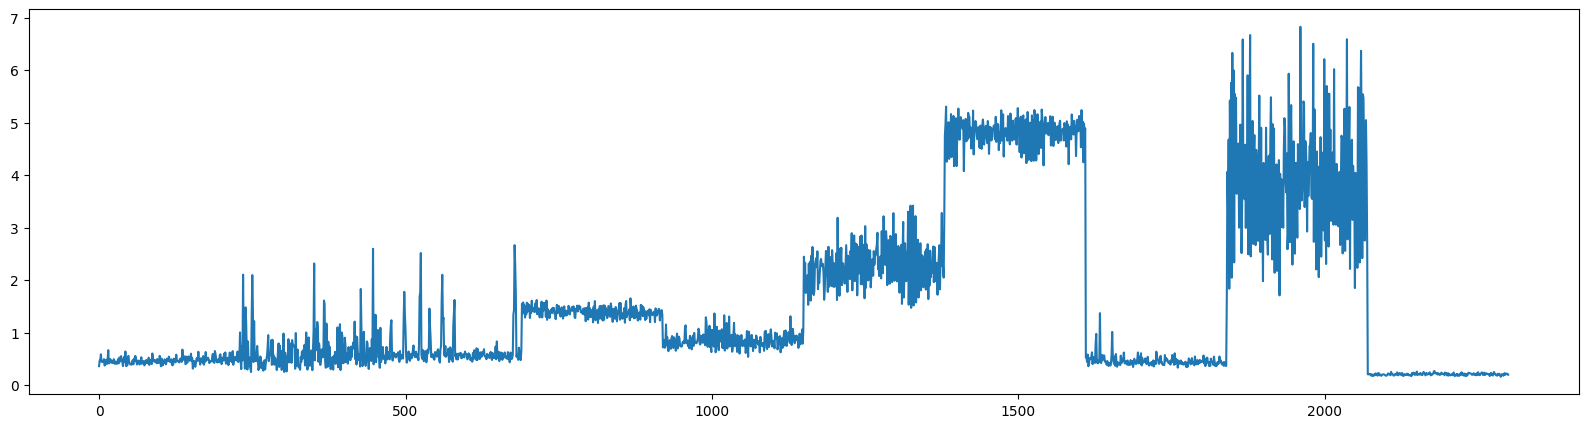

In [18]:
plt.figure(figsize=(20,5)) 
plt.plot(df['max'])
plt.show()


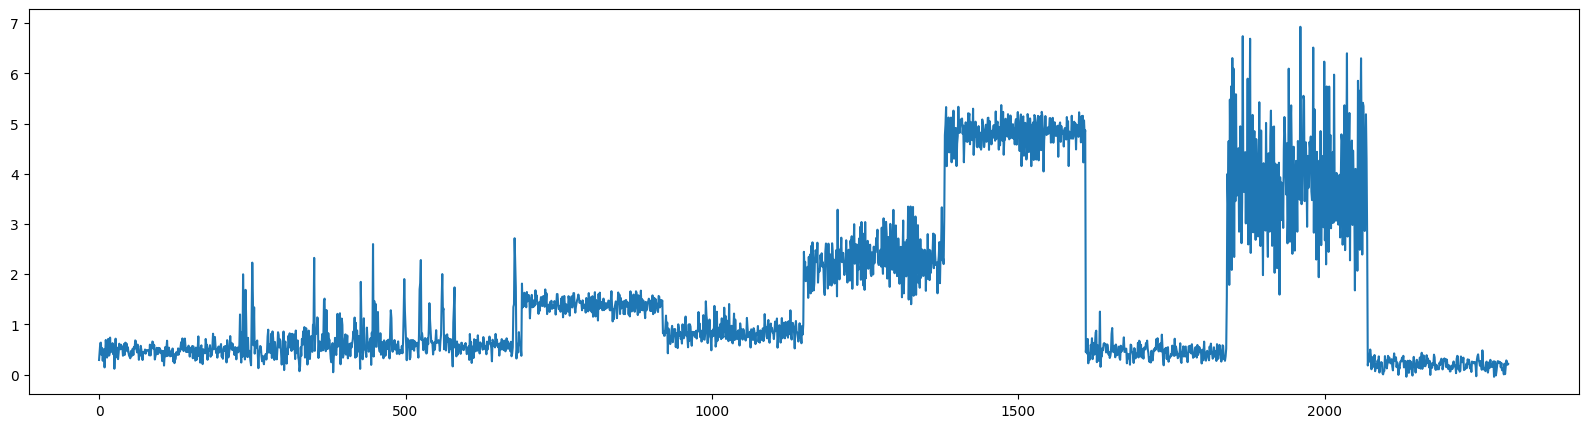

In [19]:
plt.figure(figsize=(20,5)) 
plt.plot(noisy_df['max'])
plt.show()

In [42]:
# 1- pure
#0 - noisy

df = df.assign(target=1)

In [43]:
df.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,target
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,1


In [22]:
df.dtypes

max         float64
min         float64
mean        float64
sd          float64
rms         float64
skewness    float64
kurtosis    float64
crest       float64
form        float64
target        int64
dtype: object

In [44]:
noisy_df = noisy_df.assign(target=0)

In [24]:
noisy_df.head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,target
0,0.293227,-0.356207,-0.052138,-0.011903,0.121280,-0.130129,-0.111730,2.908326,6.880490,0
1,0.467470,-0.164841,-0.074330,0.125090,-0.110948,0.308419,-0.109293,3.453040,6.062869,0
2,0.628804,-0.420709,-0.046761,0.213752,0.142447,0.077705,-0.352688,3.141677,7.440057,0
3,0.639147,-0.564494,0.015901,0.116827,0.046728,0.124948,0.371331,3.737994,7.487873,0
4,0.395002,-0.438689,0.015309,0.321735,0.158317,-0.043555,0.585666,3.278111,6.308632,0


In [45]:
from pandas.core.algorithms import IndexLabel
Mixed_set=pd.DataFrame()
Mixed_set = pd.concat([df,noisy_df ], axis=0)
Mixed_set = Mixed_set.reset_index(drop=True)
Mixed_set.head(6)

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,target
0,0.35986,-0.41890,0.017840,0.122746,0.124006,-0.118571,-0.042219,2.901946,6.950855,1
1,0.46772,-0.36111,0.022255,0.132488,0.134312,0.174699,-0.081548,3.482334,6.035202,1
2,0.46855,-0.43809,0.020470,0.149651,0.151008,0.040339,-0.274069,3.102819,7.376926,1
3,0.58475,-0.54303,0.020960,0.157067,0.158422,-0.023266,0.134692,3.691097,7.558387,1
4,0.44685,-0.57891,0.022167,0.138189,0.139922,-0.081534,0.402783,3.193561,6.312085,1
5,0.43726,-0.44435,0.021119,0.138763,0.140328,-0.131329,-0.168557,3.115990,6.644538,1


In [46]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

X_train, X_test, y_train, y_test = train_test_split(Mixed_set, Mixed_set.loc[:,'target'], test_size=0.33, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [47]:
def generateFrames(data_set,size = 6,overlap = True):
  # generate overlapping frames
  list_of_dfs = [data_set.loc[i:i+size-1,:] for i in range(0, len(data_set), 1 if overlap else size) if i < len(data_set) - size]
 
  data = []
  labels = []
  for d in list_of_dfs:
    if(len(d)==size):
      values = d[['rms']].values.flatten()
      min_val = tf.reduce_min(values)
      max_val = tf.reduce_max(values)
      values = (values - min_val) / (max_val - min_val)
      data.append(values)

      labels.append(d['target'].sum() < 4)

  labels = np.asarray(labels, dtype=bool) 
  data = np.array(data)

  return (data,labels)

In [48]:
train_data,train_labels = generateFrames(X_train,12)
test_data,test_labels = generateFrames(X_test,12)

In [49]:
def plotUsingAutoEncoder(model):
  size = 12
  list_of_dfs = [Mixed_set.loc[i:i+size-1,:] for i in range(0,len(Mixed_set),12)if i<len(Mixed_set)-12]

  denoised = []

  for d in list_of_dfs:
    if(len(d)== size):
      values = d[['rms']].values.flatten()
      min_val = tf.reduce_min(values)
      max_val = tf.reduce_max(values)
      values = (values - min_val) / (max_val - min_val)
      encoded_data = model.encoder( np.array([values])).numpy()
      [values] = model.decoder(encoded_data).numpy()
      values = (np.array(values) * (max_val - min_val).numpy())   + min_val.numpy()
      denoised = np.concatenate((np.array(denoised) , np.array(values)))

  denoised = np.array(denoised)
  Mixed_set['denoised'] = pd.DataFrame(denoised, columns=['denoised']) 
  noise = Mixed_set[['rms']].values.flatten()

  plt.figure(figsize=(20,5)) 
  plt.plot(noise)
  plt.plot(denoised, color="red")
  plt.legend(labels=["Input", "Reconstruction" ])
  plt.xlabel('No. data points')
  plt.ylabel('rms value')
  plt.show()


In [50]:
class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(12,)),
        tf.keras.layers.Dense(12, activation = 'softmax'),
        tf.keras.layers.Dense(6, activation = 'softmax'),
        tf.keras.layers.Dense(3, activation = 'softmax'),
        tf.keras.layers.Dense(1),
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(24, activation="relu"),
      tf.keras.layers.Dense(12, activation="relu"),
      tf.keras.layers.Dense(6, activation="relu"),
      tf.keras.layers.Dense(3, activation="relu")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(6, activation="relu"),
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(12, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
discriminator.fit(train_data, train_labels, epochs=10)

Epoch 1/10
96/96 [==============================] - 1s 2ms/step - loss: 0.6204 - accuracy: 0.9085
Epoch 2/10
96/96 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.9085
Epoch 3/10
96/96 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.9085
Epoch 4/10
96/96 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.9085
Epoch 5/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3550 - accuracy: 0.9085
Epoch 6/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3385 - accuracy: 0.9085
Epoch 7/10
96/96 [==============================] - 0s 4ms/step - loss: 0.3278 - accuracy: 0.9085
Epoch 8/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.9085
Epoch 9/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.9085
Epoch 10/10
96/96 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.9085


In [51]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE


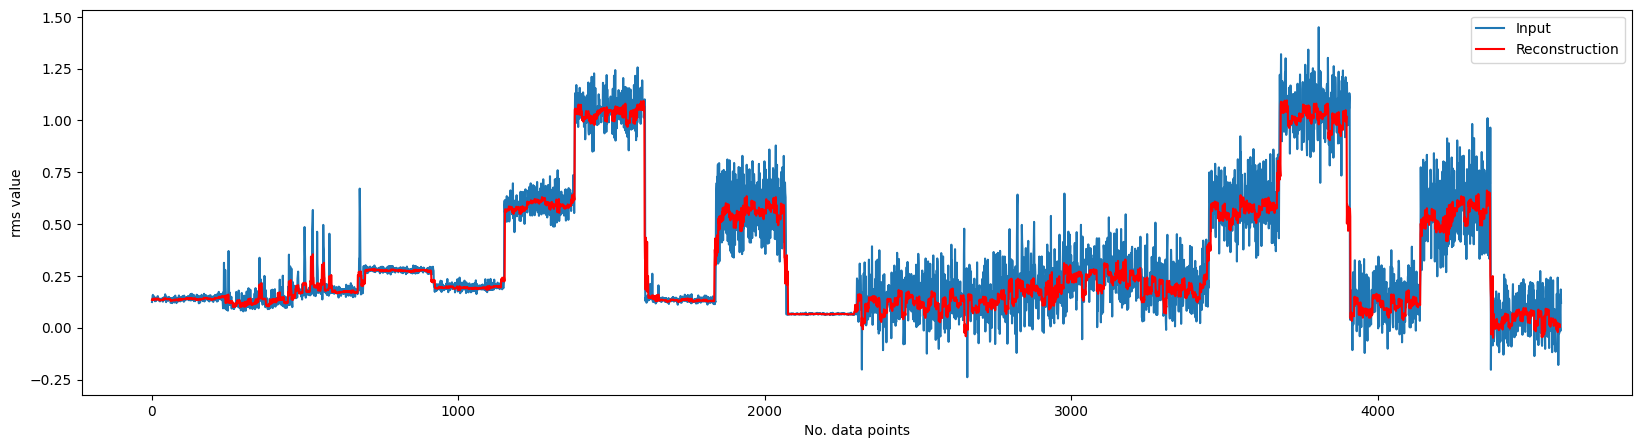

Epoch 1 Starting
Epoch 1 DONE


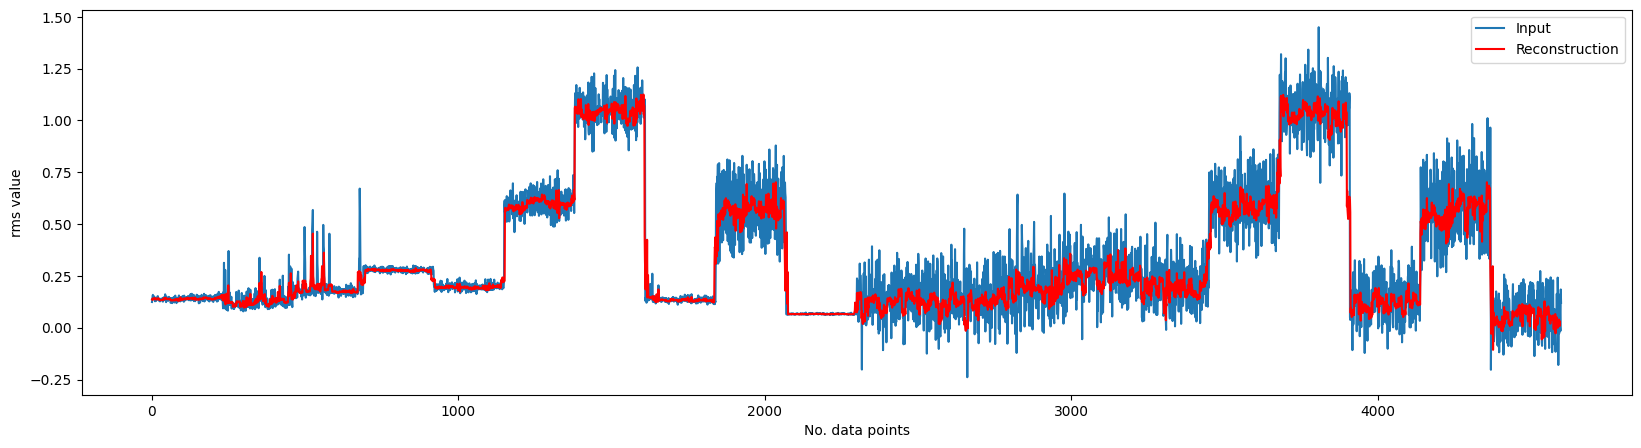

Epoch 2 Starting
Epoch 2 DONE


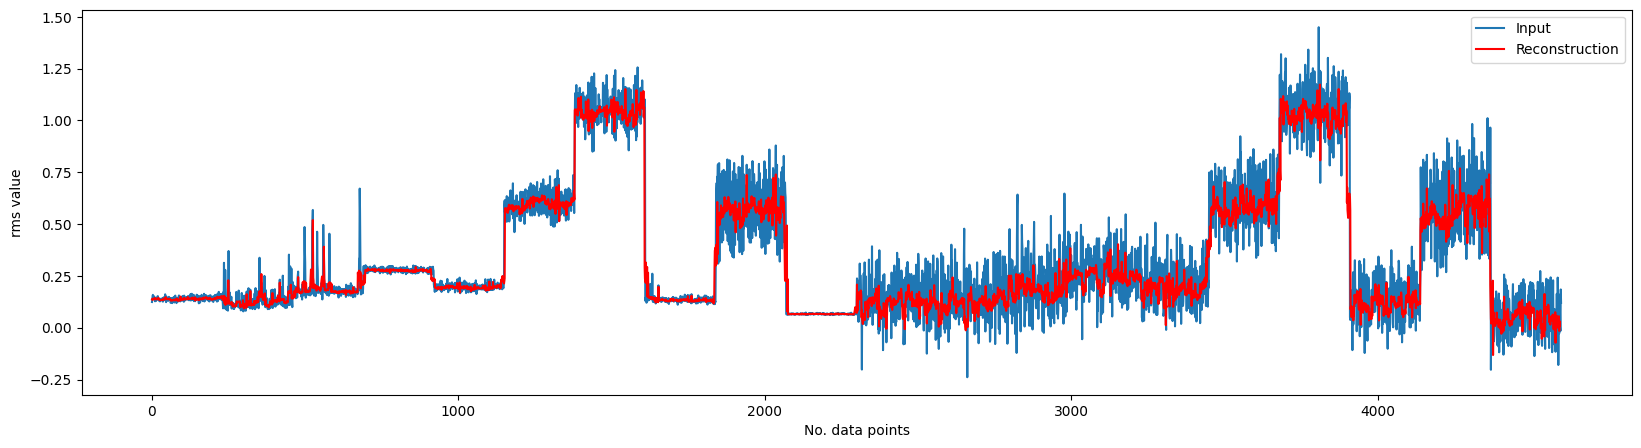

Epoch 3 Starting
Epoch 3 DONE


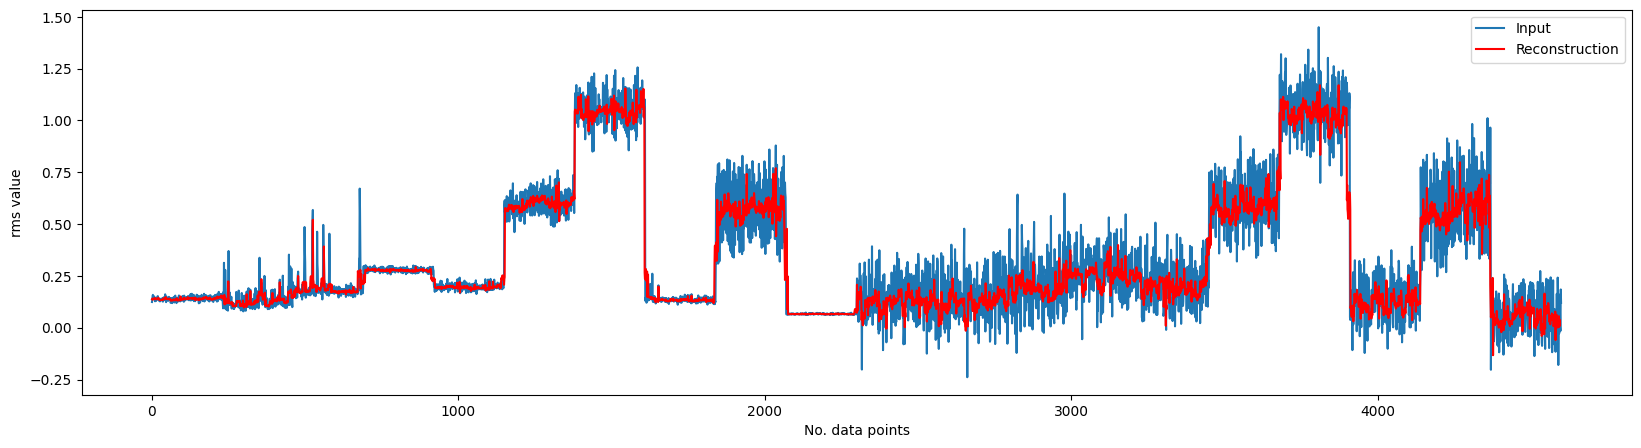

Epoch 4 Starting
Epoch 4 DONE


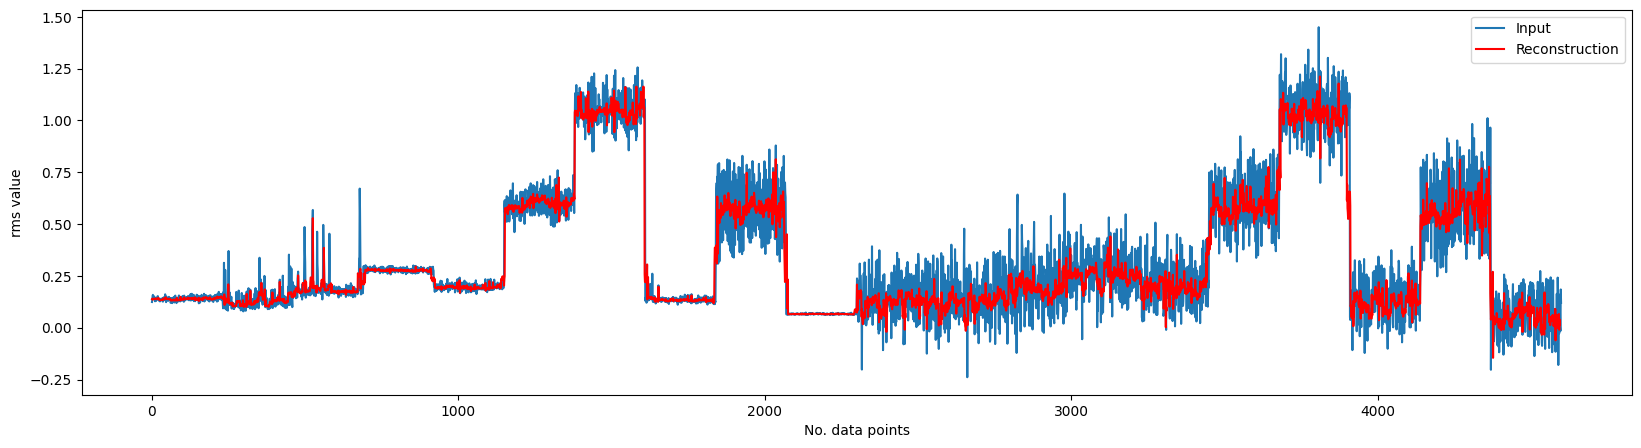

Epoch 5 Starting
Epoch 5 DONE


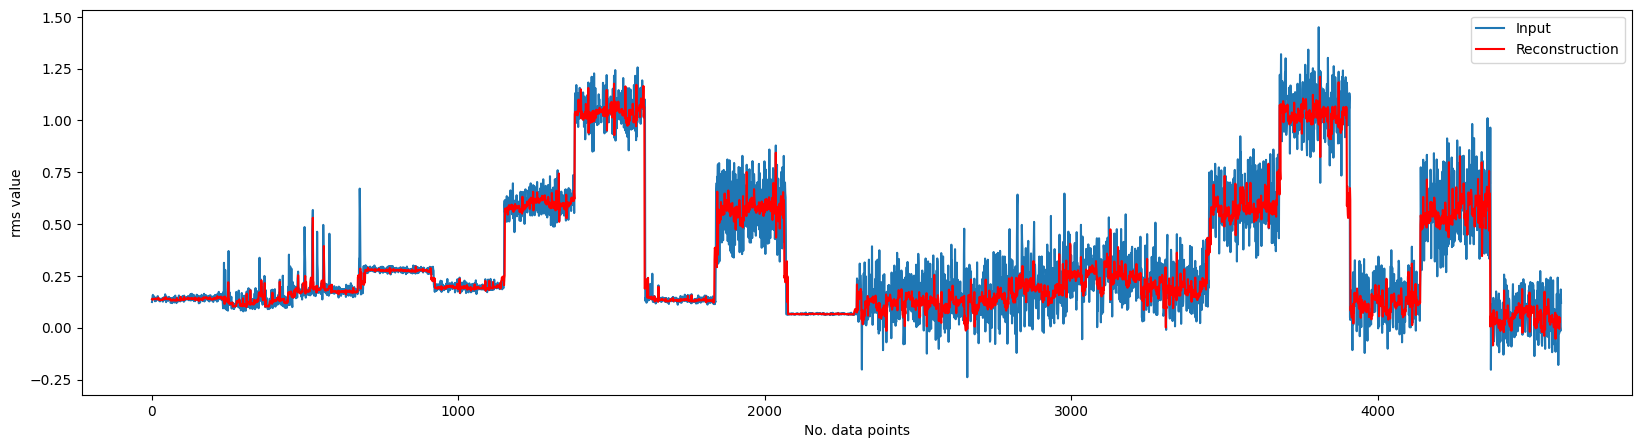

Epoch 6 Starting
Epoch 6 DONE


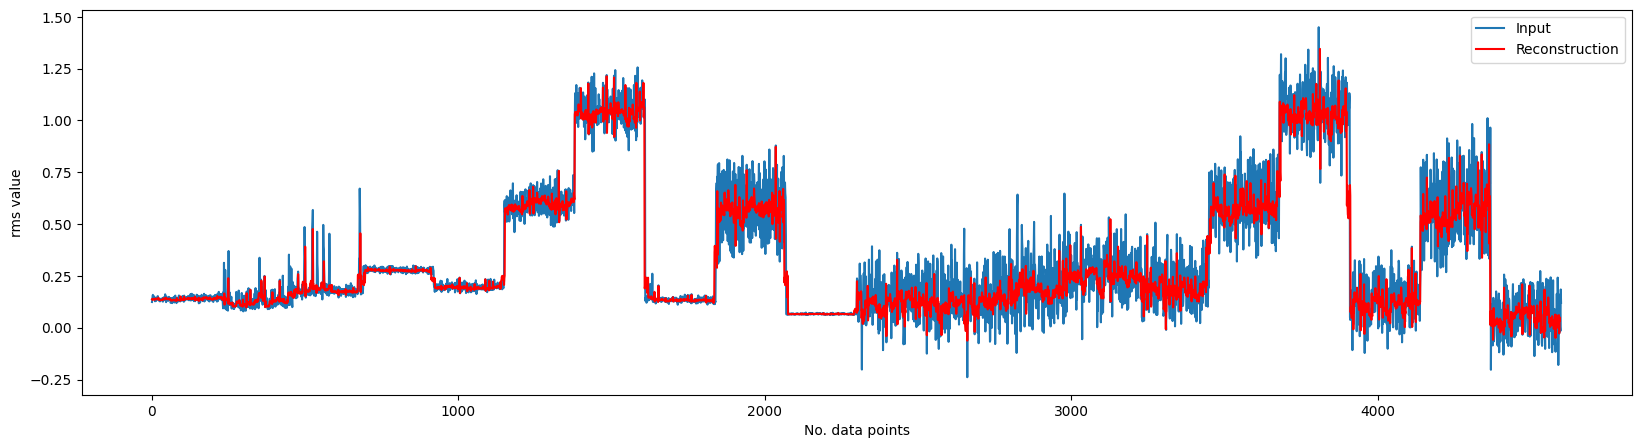

Epoch 7 Starting
Epoch 7 DONE


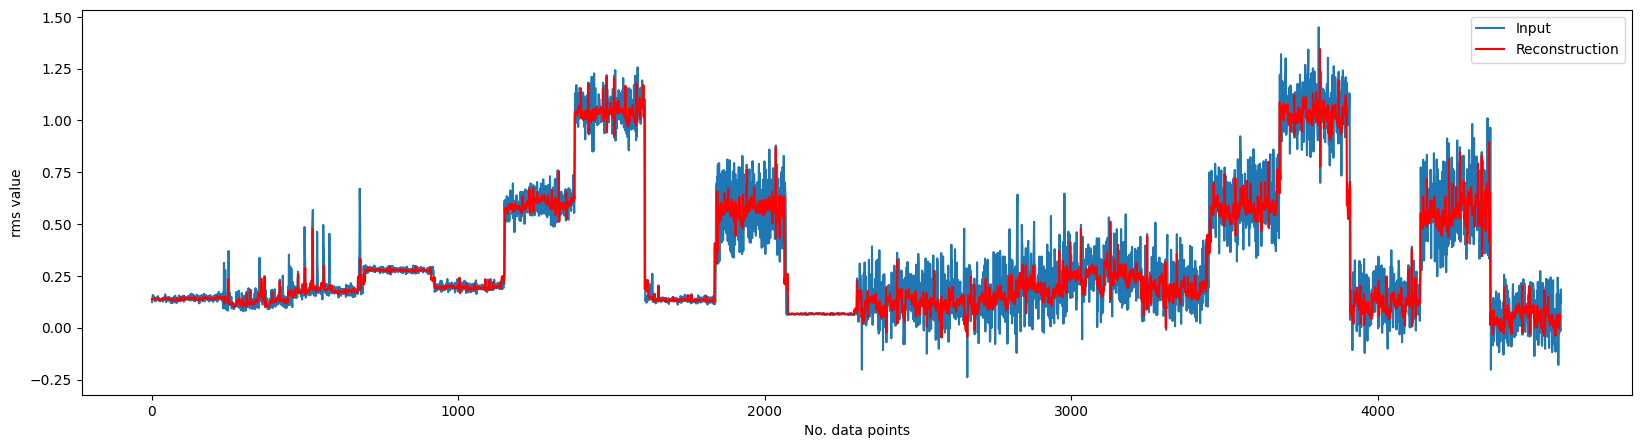

Epoch 8 Starting
Epoch 8 DONE


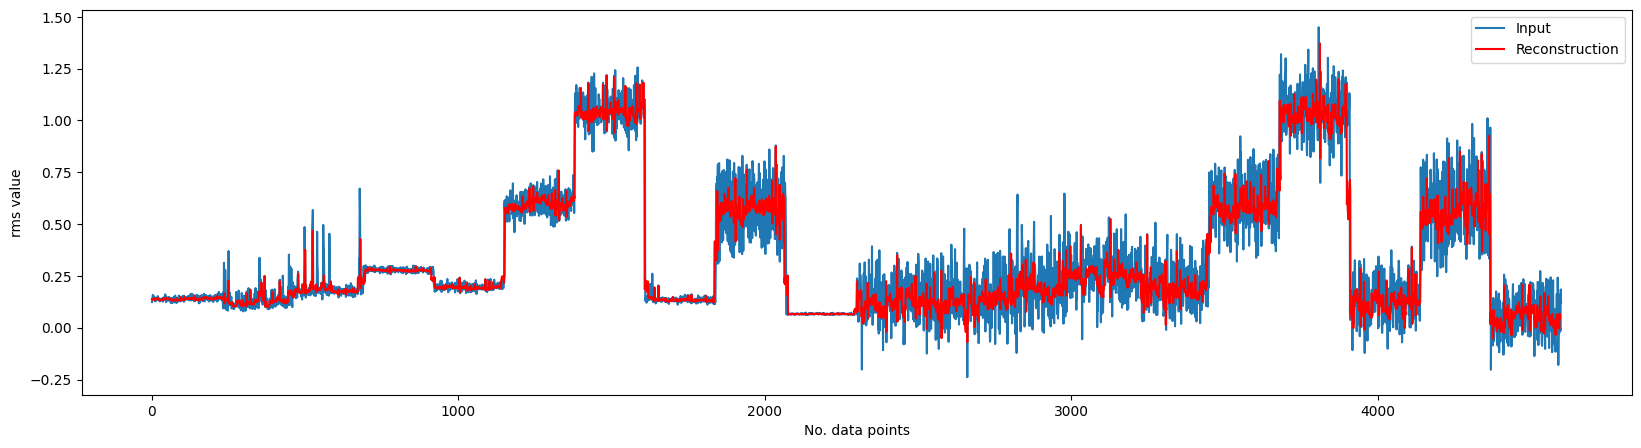

Epoch 9 Starting
Epoch 9 DONE


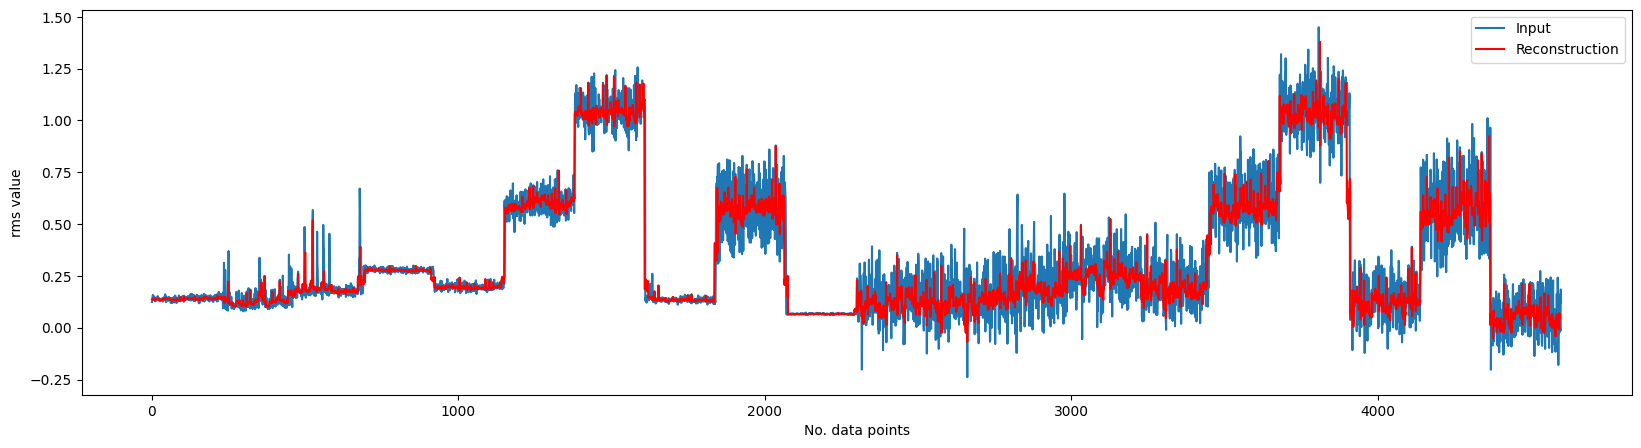

In [52]:
step = 0
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for frame in train_data:
    #print(frame)
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([frame]))
      disc_output = discriminator(np.array(output))

      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(frame, output[0]) * -disc_output[0][0]

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))

  
  print("Epoch " + str(epoch) +" DONE")
  plotUsingAutoEncoder(generator)

In [35]:
df['rms']

0       0.124006
1       0.134312
2       0.151008
3       0.158422
4       0.139922
          ...   
2295    0.064983
2296    0.069883
2297    0.068279
2298    0.067977
2299    0.064396
Name: rms, Length: 2300, dtype: float64

In [53]:
Mixed_set['denoised'][2300:]

2300    0.076703
2301    0.226674
2302    0.078815
2303    0.079972
2304    0.148387
          ...   
4595    0.046494
4596         NaN
4597         NaN
4598         NaN
4599         NaN
Name: denoised, Length: 2300, dtype: float64

In [54]:
num=np.mean(np.square(df['rms']))

In [55]:
length = len(df['rms'])

In [ ]:
li =[]
li2 = df['rms'].values.tolist()   #original
li3= Mixed_set['denoised'][2300:].values.tolist()   #separated
for i in range(length):
  li.append(li2[i] - li3[i])

li

In [57]:
separated = pd.DataFrame(li, columns=['separated'])

In [58]:
den=np.mean(np.square(separated))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [59]:
10 * np.log10(num / den)

separated    14.356953
dtype: float64